In [1]:
import pandas as pd,numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
def percentage(df,df1,item):
    all_loans = df[item].value_counts().sort_index()
    bad_loans = pd.DataFrame(df_bad[item].value_counts().sort_index() / all_loans * 100)
    n_percent = pd.concat([all_loans,bad_loans],axis=1)
    n_percent.columns = ['n_samples', 'percent']
    print(n_percent)
    
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y    

In [3]:
df = pd.read_csv('loan_data_core.csv')

C:\Users\leero\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#dropping not so important stuff, variables that appear in the future

drop_list = ['member_id','url','desc','emp_title','title','addr_state','next_pymnt_d','last_pymnt_amnt',
             'hardship_flag','hardship_type','hardship_reason','hardship_status','hardship_amount',
             'hardship_start_date','hardship_end_date','payment_plan_start_date','hardship_length',
             'hardship_dpd','hardship_loan_status','orig_projected_additional_accrued_interest',
             'hardship_payoff_balance_amount','hardship_last_payment_amount','debt_settlement_flag',
             'out_prncp_inv','out_prncp','recoveries','last_fico_range_high','last_fico_range_low',
             'policy_code','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee'
             ]
df.dropna(subset=['id'],inplace=True)
df.drop(drop_list,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507640 entries, 0 to 2507639
Columns: 117 entries, id to settlement_term
dtypes: float64(92), int64(1), object(24)
memory usage: 2.2+ GB


In [5]:
#conversions
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format='%b-%y')
df['length_of_cr'] = df.issue_d - df.earliest_cr_line
df.length_of_cr = df.length_of_cr.dt.days.astype(int)/365

#cash = 1
df.disbursement_method = df.disbursement_method.apply(lambda disbursement_method: 1 if disbursement_method =='Cash' else 0)

#good loans = 1
df.loan_status = df.loan_status.apply(lambda loan_status: 1 if loan_status != 'Charged Off' else 0)
df.term = df.term.apply(lambda months: int(months[1:3]))

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507640 entries, 0 to 2507639
Columns: 118 entries, id to length_of_cr
dtypes: datetime64[ns](2), float64(93), int64(4), object(19)
memory usage: 2.2+ GB


In [6]:
df_bad = df.loc[df.loan_status==0]
df_pass = df.loc[df.loan_status==1]

print(len(df_bad)/len(df))

len(df_bad),len(df_pass)

0.19864095324687756


(498120, 2009520)

In [7]:
for thing in df.columns:
    print(thing)

id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
purpose
zip_code
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
collection_recovery_fee
last_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
delinq_amnt
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent

In [8]:
percentage(df,df_pass,'grade')

   n_samples    percent
A     434114   5.989210
B     731908  13.260137
C     711534  22.216507
D     374050  30.109344
E     177466  38.392706
F      61314  45.046808
G      17254  49.913064


In [9]:
percentage(df,df_bad,'grade')

   n_samples    percent
A     434114   5.989210
B     731908  13.260137
C     711534  22.216507
D     374050  30.109344
E     177466  38.392706
F      61314  45.046808
G      17254  49.913064


In [10]:
percentage(df,df_bad,'disbursement_method')

print(len(df_bad)/len(df))

q = df.loc[df.disbursement_method == 0]['loan_status']

stats.ttest_1samp(q,len(df_pass)/len(df))

   n_samples    percent
0       9424  21.901528
1    2498216  19.856410
0.19864095324687756


Ttest_1sampResult(statistic=-4.782108099623668, pvalue=1.760958547972953e-06)

In [11]:
percentage(df,df_bad,'pub_rec_bankruptcies')

      n_samples     percent
0.0     2195318   19.491481
1.0      291904   22.368998
2.0       14856   24.771136
3.0        3012   22.841965
4.0         744   27.688172
5.0         266   24.060150
6.0          90   33.333333
7.0          30   26.666667
8.0          18   44.444444
9.0           4   50.000000
11.0          2  100.000000
12.0          2         NaN


In [12]:
df.pub_rec_bankruptcies.value_counts().sort_index()

0.0     2195318
1.0      291904
2.0       14856
3.0        3012
4.0         744
5.0         266
6.0          90
7.0          30
8.0          18
9.0           4
11.0          2
12.0          2
Name: pub_rec_bankruptcies, dtype: int64

In [13]:
print(len(df_pass)/len(df))

for n in range(13):
    q = df.loc[df.pub_rec_bankruptcies > n]['loan_status']
    print(n,np.mean(q),stats.ttest_1samp(q,len(df_pass)/len(df)))

0.8013590467531224
0 0.7749189522976381 Ttest_1sampResult(statistic=-35.3016183361352, pvalue=1.9306831281258704e-272)
1 0.7535744322960471 Ttest_1sampResult(statistic=-15.294019158451372, pvalue=1.720678204181511e-52)
2 0.7581573896353166 Ttest_1sampResult(statistic=-6.512774762957765, pvalue=8.25370462174509e-11)
3 0.7231833910034602 Ttest_1sampResult(statistic=-5.938027864030991, pvalue=3.811556938081145e-09)
4 0.7233009708737864 Ttest_1sampResult(statistic=-3.5373286455001787, pvalue=0.00045028370651973285)
5 0.6575342465753424 Ttest_1sampResult(statistic=-3.6496399135071913, pvalue=0.0003657339433507724)
6 0.6428571428571429 Ttest_1sampResult(statistic=-2.453226270973029, pvalue=0.01735593601309045)
7 0.5384615384615384 Ttest_1sampResult(statistic=-2.6367878046950852, pvalue=0.01418037686703649)
8 0.5 Ttest_1sampResult(statistic=-1.5946421860964979, pvalue=0.15482181803309875)
9 0.5 Ttest_1sampResult(statistic=-1.0439383605938655, pvalue=0.3732299812766604)
10 0.5 Ttest_1sampResul

C:\Users\leero\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\leero\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leero\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\leero\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\leero\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\leero\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\leero\Anaconda3\lib\

In [14]:
percentage(df,df_bad,'verification_status')

                 n_samples    percent
Not Verified        749220  14.468647
Source Verified     969034  20.935282
Verified            789386  23.670042


In [15]:
df.verification_status.value_counts().sort_index()

Not Verified       749220
Source Verified    969034
Verified           789386
Name: verification_status, dtype: int64

In [16]:
percentage(df,df_bad,'home_ownership')

          n_samples    percent
ANY             518  19.305019
MORTGAGE    1242936  17.133947
NONE             96  14.583333
OTHER           288  18.750000
OWN          266898  20.517201
RENT         996904  23.094300


In [17]:
df.home_ownership.value_counts().sort_index()

ANY             518
MORTGAGE    1242936
NONE             96
OTHER           288
OWN          266898
RENT         996904
Name: home_ownership, dtype: int64

In [42]:
percentage(df,df_bad,'grade')

   n_samples    percent
A     434114   5.989210
B     731908  13.260137
C     711534  22.216507
D     374050  30.109344
E     177466  38.392706
F      61314  45.046808
G      17254  49.913064


In [18]:
percentage(df,df_bad,'sub_grade')

    n_samples    percent
A1      79660   3.218679
A2      68442   4.631659
A3      69396   5.481584
A4      97030   6.742245
A5     119586   8.295285
B1     131774  10.266062
B2     137888  11.251160
B3     153242  12.862009
B4     156188  14.705355
B5     152816  16.576798
C1     159434  18.791475
C2     148146  20.579698
C3     140024  22.303319
C4     138548  24.688916
C5     125382  25.676732
D1      96310  27.646143
D2      83326  29.268176
D3      72988  30.172083
D4      66020  32.247804
D5      55406  33.025304
E1      45432  36.084698
E2      40602  37.549874
E3      34722  38.672888
E4      29760  40.080645
E5      26950  41.328386
F1      18972  42.040902
F2      13834  45.294203
F3      11694  44.894818
F4       9324  47.683398
F5       7490  49.158879
G1       5526  48.172277
G2       4114  49.052018
G3       3102  51.321728
G4       2410  50.705394
G5       2102  53.187441


In [43]:
percentage(df.loc[df.verification_status!='Not Verified'],df_bad.loc[df_bad.verification_status!='Not Verified'],'grade')

   n_samples    percent
A     235730  11.029568
B     473476  20.497765
C     526972  29.997419
D     295522  38.110191
E     154562  44.081987
F      55898  49.411428
G      16260  52.964330


In [22]:
percentage(df,df_bad,'verification_status_joint')

                 n_samples    percent
Not Verified         22572  21.664009
Source Verified       7894  23.030149
Verified              5834  25.917038


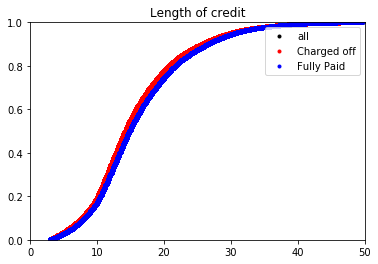

count    2.507640e+06
mean     1.602440e+01
std      7.998902e+00
min     -6.004110e+01
25%      1.117534e+01
50%      1.475616e+01
75%      1.993151e+01
max      4.970137e+01
Name: length_of_cr, dtype: float64
count    498120.000000
mean         15.445255
std           8.078662
min         -58.709589
25%          10.838356
50%          14.178082
75%          19.183562
max          49.117808
Name: length_of_cr, dtype: float64
count    2.009520e+06
mean     1.616796e+01
std      7.972506e+00
min     -6.004110e+01
25%      1.126027e+01
50%      1.484384e+01
75%      2.009863e+01
max      4.970137e+01
Name: length_of_cr, dtype: float64


In [23]:
df_x,df_y = ecdf(df.length_of_cr)
df_bad_x,df_bad_y = ecdf(df_bad.length_of_cr)
df_pass_x,df_pass_y = ecdf(df_pass.length_of_cr)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 50, 0, 1])
plt.title('Length of credit')
plt.legend(loc='best')
plt.show()

print(df.length_of_cr.describe())
print(df_bad.length_of_cr.describe())
print(df_pass.length_of_cr.describe())


In [24]:
percentage(df,df_pass,'emp_length')

           n_samples    percent
1 year        164812  20.469383
10+ years     824588  18.725230
2 years       226758  19.733813
3 years       200576  19.910657
4 years       150192  19.701449
5 years       157126  19.511729
6 years       117608  19.248691
7 years       112658  19.442916
8 years       115110  19.881852
9 years        95802  19.876412
< 1 year      199366  20.336467


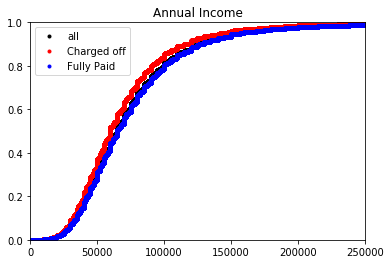

count    2.507640e+06
mean     7.609940e+04
std      6.969604e+04
min      0.000000e+00
25%      4.594575e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64
count    4.981200e+05
mean     7.024296e+04
std      6.568454e+04
min      0.000000e+00
25%      4.300000e+04
50%      6.000000e+04
75%      8.500000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64
count    2.009520e+06
mean     7.755109e+04
std      7.058010e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.270000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64


In [25]:
df_x,df_y = ecdf(df.annual_inc)
df_bad_x,df_bad_y = ecdf(df_bad.annual_inc)
df_pass_x,df_pass_y = ecdf(df_pass.annual_inc)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 250000, 0, 1])
plt.title('Annual Income')
plt.legend(loc='best')
plt.show()

print(df.annual_inc.describe())
print(df_bad.annual_inc.describe())
print(df_pass.annual_inc.describe())

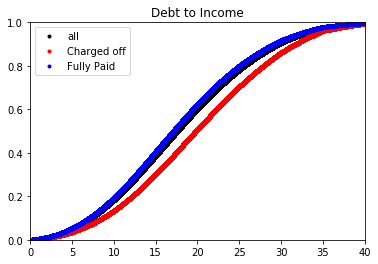

count    2.507172e+06
mean     1.822313e+01
std      1.051788e+01
min     -1.000000e+00
25%      1.181000e+01
50%      1.761000e+01
75%      2.401000e+01
max      9.990000e+02
Name: dti, dtype: float64
count    498034.000000
mean         20.132151
std          10.537612
min           0.000000
25%          13.630000
50%          19.800000
75%          26.310000
max         999.000000
Name: dti, dtype: float64
count    2.009138e+06
mean     1.774991e+01
std      1.045924e+01
min     -1.000000e+00
25%      1.143000e+01
50%      1.709000e+01
75%      2.339000e+01
max      9.990000e+02
Name: dti, dtype: float64


In [26]:
df_x,df_y = ecdf(df.dti)
df_bad_x,df_bad_y = ecdf(df_bad.dti)
df_pass_x,df_pass_y = ecdf(df_pass.dti)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40, 0, 1])
plt.title('Debt to Income')
plt.legend(loc='best')
plt.show()

print(df.dti.describe())
print(df_bad.dti.describe())
print(df_pass.dti.describe())

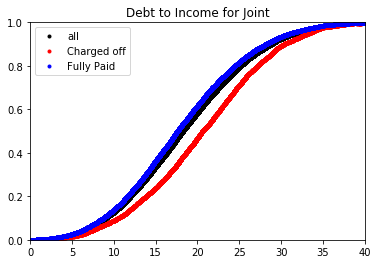

count    36552.000000
mean        18.686105
std          7.573205
min          0.000000
25%         13.217500
50%         18.265000
75%         23.832500
max         69.490000
Name: dti_joint, dtype: float64
count    8248.000000
mean       20.652650
std         7.692684
min         0.770000
25%        15.340000
50%        20.600000
75%        25.830000
max        69.490000
Name: dti_joint, dtype: float64
count    28304.000000
mean        18.113038
std          7.441006
min          0.000000
25%         12.770000
50%         17.590000
75%         23.070000
max         61.900000
Name: dti_joint, dtype: float64


In [27]:
df_x,df_y = ecdf(df.dti_joint.dropna())
df_bad_x,df_bad_y = ecdf(df_bad.dti_joint.dropna())
df_pass_x,df_pass_y = ecdf(df_pass.dti_joint.dropna())

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40, 0, 1])
plt.title('Debt to Income for Joint')
plt.legend(loc='best')
plt.show()

print(df.dti_joint.describe())
print(df_bad.dti_joint.describe())
print(df_pass.dti_joint.describe())

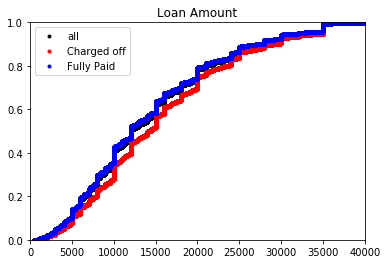

count    2.507640e+06
mean     1.441101e+04
std      8.663254e+03
min      5.000000e+02
25%      8.000000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64
count    498120.000000
mean      15507.632097
std        8743.623101
min         900.000000
25%        9000.000000
50%       14250.000000
75%       20200.000000
max       40000.000000
Name: loan_amnt, dtype: float64
count    2.009520e+06
mean     1.413918e+04
std      8.621673e+03
min      5.000000e+02
25%      7.500000e+03
50%      1.200000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64


In [28]:
df_x,df_y = ecdf(df.loan_amnt)
df_bad_x,df_bad_y = ecdf(df_bad.loan_amnt)
df_pass_x,df_pass_y = ecdf(df_pass.loan_amnt)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 40000, 0, 1])
plt.title('Loan Amount')
plt.legend(loc='best')
plt.show()

print(df.loan_amnt.describe())
print(df_bad.loan_amnt.describe())
print(df_pass.loan_amnt.describe())

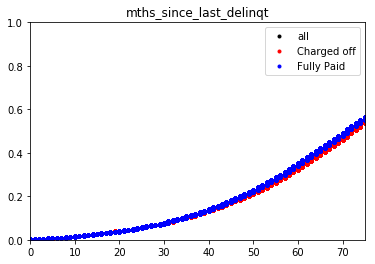

count    426228.000000
mean         70.417044
std          26.664615
min           0.000000
25%          53.000000
50%          71.000000
75%          90.000000
max         129.000000
Name: mths_since_last_record, dtype: float64
count    96542.000000
mean        70.763875
std         26.407839
min          0.000000
25%         53.000000
50%         72.000000
75%         90.000000
max        129.000000
Name: mths_since_last_record, dtype: float64
count    329686.000000
mean         70.315482
std          26.738528
min           0.000000
25%          52.000000
50%          71.000000
75%          90.000000
max         123.000000
Name: mths_since_last_record, dtype: float64


In [29]:
df_x,df_y = ecdf(df.mths_since_last_record.dropna())
df_bad_x,df_bad_y = ecdf(df_bad.mths_since_last_record.dropna())
df_pass_x,df_pass_y = ecdf(df_pass.mths_since_last_record.dropna())

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 75, 0, 1])
plt.title('mths_since_last_delinqt')
plt.legend(loc='best')
plt.show()

print(df.mths_since_last_record.describe())
print(df_bad.mths_since_last_record.describe())
print(df_pass.mths_since_last_record.describe())


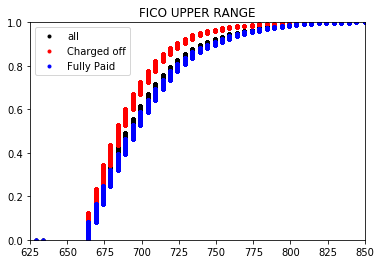

count    2.507640e+06
mean     6.998591e+02
std      3.161493e+01
min      6.290000e+02
25%      6.740000e+02
50%      6.940000e+02
75%      7.140000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64
count    498120.000000
mean        691.429563
std          25.552005
min         664.000000
25%         674.000000
50%         684.000000
75%         704.000000
max         850.000000
Name: fico_range_high, dtype: float64
count    2.009520e+06
mean     7.019486e+02
std      3.261042e+01
min      6.290000e+02
25%      6.790000e+02
50%      6.940000e+02
75%      7.190000e+02
max      8.500000e+02
Name: fico_range_high, dtype: float64


In [30]:
df_x,df_y = ecdf(df.fico_range_high)
df_bad_x,df_bad_y = ecdf(df_bad.fico_range_high)
df_pass_x,df_pass_y = ecdf(df_pass.fico_range_high)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([625, 850, 0, 1])
plt.title('FICO UPPER RANGE')
plt.legend(loc='best')
plt.show()

print(df.fico_range_high.describe())
print(df_bad.fico_range_high.describe())
print(df_pass.fico_range_high.describe())

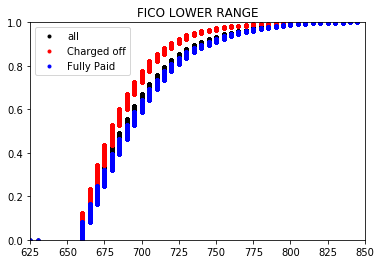

count    2.507640e+06
mean     6.958590e+02
std      3.161433e+01
min      6.250000e+02
25%      6.700000e+02
50%      6.900000e+02
75%      7.100000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64
count    498120.000000
mean        687.429515
std          25.551707
min         660.000000
25%         670.000000
50%         680.000000
75%         700.000000
max         845.000000
Name: fico_range_low, dtype: float64
count    2.009520e+06
mean     6.979485e+02
std      3.260976e+01
min      6.250000e+02
25%      6.750000e+02
50%      6.900000e+02
75%      7.150000e+02
max      8.450000e+02
Name: fico_range_low, dtype: float64


In [31]:
df_x,df_y = ecdf(df.fico_range_low)
df_bad_x,df_bad_y = ecdf(df_bad.fico_range_low)
df_pass_x,df_pass_y = ecdf(df_pass.fico_range_low)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([625, 850, 0, 1])
plt.title('FICO LOWER RANGE')
plt.legend(loc='best')
plt.show()

print(df.fico_range_low.describe())
print(df_bad.fico_range_low.describe())
print(df_pass.fico_range_low.describe())

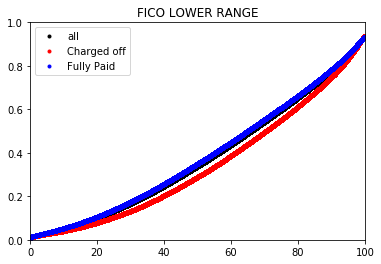

count    2.386342e+06
mean     6.044169e+01
std      2.812853e+01
min      0.000000e+00
25%      3.900000e+01
50%      6.380000e+01
75%      8.510000e+01
max      3.396000e+02
Name: bc_util, dtype: float64
count    478756.000000
mean         64.283428
std          27.382505
min           0.000000
25%          44.600000
50%          68.800000
75%          88.300000
max         255.200000
Name: bc_util, dtype: float64
count    1.907586e+06
mean     5.947751e+01
std      2.823074e+01
min      0.000000e+00
25%      3.780000e+01
50%      6.250000e+01
75%      8.430000e+01
max      3.396000e+02
Name: bc_util, dtype: float64


In [46]:
df_x,df_y = ecdf(df.bc_util)
df_bad_x,df_bad_y = ecdf(df_bad.bc_util)
df_pass_x,df_pass_y = ecdf(df_pass.bc_util)

plt.plot(df_x,df_y,marker='.',linestyle='none',color='black',label='all')
plt.plot(df_bad_x,df_bad_y,marker='.',linestyle='none',color='red',label='Charged off')
plt.plot(df_pass_x,df_pass_y,marker='.',linestyle='none',color='blue',label='Fully Paid')
plt.axis([0, 100, 0, 1])
plt.title('bc_util')
plt.legend(loc='best')
plt.show()

print(df.bc_util.describe())
print(df_bad.bc_util.describe())
print(df_pass.bc_util.describe())

# About the graphs and the EDA

The graphs show and the whole exploratory data analysis so far has shown obvious things. With factors that are desirable the good loans out performed the bad loans. Although good loans do look very close to the population while, the bad loans do seem to significantly deviate from the norm. 

In [32]:
df_bad.tot_coll_amt.describe()

count    477484.000000
mean        237.522505
std        1752.307548
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      146917.000000
Name: tot_coll_amt, dtype: float64

In [33]:
percentage(df,df_bad,'loan_status')

   n_samples  percent
0     498120    100.0
1    2009520      NaN


There is little difference between the loan amount, the funded, and the proportion funded by investors.

In [34]:
percentage(df,df_bad,'purpose')

                    n_samples    percent
car                     27082  14.400709
credit_card            551450  16.858827
debt_consolidation    1461114  21.066255
educational               652  17.177914
home_improvement       161660  17.622170
house                   12736  21.278266
major_purchase          54082  18.165009
medical                 28352  21.621050
moving                  17616  23.206176
other                  141124  20.924860
renewable_energy         1744  23.279817
small_business          28818  29.308071
vacation                16622  18.998917
wedding                  4588  12.162162


In [36]:
percentage(df,df_bad,'purpose')

print(len(df_bad)/len(df))

edu = df.loc[df.purpose == 'educational']['loan_status']

stats.ttest_1samp(edu,len(df_pass)/len(df))

                    n_samples    percent
car                     27082  14.400709
credit_card            551450  16.858827
debt_consolidation    1461114  21.066255
educational               652  17.177914
home_improvement       161660  17.622170
house                   12736  21.278266
major_purchase          54082  18.165009
medical                 28352  21.621050
moving                  17616  23.206176
other                  141124  20.924860
renewable_energy         1744  23.279817
small_business          28818  29.308071
vacation                16622  18.998917
wedding                  4588  12.162162
0.19864095324687756


Ttest_1sampResult(statistic=1.8170526287938882, pvalue=0.06966870982546704)

The first statistically not so important factor! Although this maybe because of its small sample size relative to everything else.

In [37]:
for col in df:
    print(col, df[col].isnull().values.any())

id False
loan_amnt False
funded_amnt False
funded_amnt_inv False
term False
int_rate False
installment False
grade False
sub_grade False
emp_length True
home_ownership False
annual_inc False
verification_status False
issue_d False
loan_status False
pymnt_plan False
purpose False
zip_code False
dti True
delinq_2yrs False
earliest_cr_line False
fico_range_low False
fico_range_high False
inq_last_6mths True
mths_since_last_delinq True
mths_since_last_record True
open_acc False
pub_rec False
revol_bal False
revol_util True
total_acc False
initial_list_status False
collection_recovery_fee False
last_pymnt_d True
last_credit_pull_d True
collections_12_mths_ex_med True
mths_since_last_major_derog True
application_type False
annual_inc_joint True
dti_joint True
verification_status_joint True
acc_now_delinq False
tot_coll_amt True
tot_cur_bal True
open_acc_6m True
open_act_il True
open_il_12m True
open_il_24m True
mths_since_rcnt_il True
total_bal_il True
il_util True
open_rv_12m True
open_rv_2

In [38]:
len(df.sec_app_fico_range_low.dropna())

23510

In [40]:
np.sum(df.loan_status.value_counts().values)

2507640

In [41]:
df.mo_sin_old_il_acct.value_counts()

125.0    28464
127.0    28340
126.0    28270
122.0    28240
130.0    28232
128.0    28200
124.0    28126
129.0    27900
132.0    27886
123.0    27856
121.0    27776
131.0    27502
133.0    27384
120.0    27202
134.0    27124
135.0    26666
136.0    26498
139.0    26244
137.0    26190
138.0    26082
140.0    25770
141.0    25380
142.0    24732
119.0    24506
144.0    24218
143.0    24162
145.0    23506
146.0    22870
147.0    22528
148.0    21860
         ...  
549.0        2
545.0        2
538.0        2
530.0        2
507.0        2
492.0        2
999.0        2
506.0        2
453.0        2
445.0        2
458.0        2
460.0        2
461.0        2
443.0        2
467.0        2
468.0        2
470.0        2
472.0        2
474.0        2
480.0        2
485.0        2
486.0        2
487.0        2
494.0        2
497.0        2
498.0        2
499.0        2
504.0        2
512.0        2
511.0        2
Name: mo_sin_old_il_acct, Length: 520, dtype: int64